In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
from binomial_v5 import jarrow_rudd
#0.01,0.02,0.05,0.1,
n = 200
volvol=[0.4,1,1.5,2,2.5,3.5,5]
res = np.zeros((len(volvol),n))


for i in range(len(volvol)):
    for x in range(n):
        res[i][x] = jarrow_rudd(s=100.0, k=00.0, t=1, v=0.25, rf=0.02, cp=1, div=0.02,
                                am=True, n=100,x=2,b=-200,volvol=volvol[i],kv=0.2,adjust_step=False)["value"]
    print("volvol: ",volvol[i])
    print("avg. value: ",sum(res[i])/len(res[i]))
    print("st.dev: ", np.std(res[i]))

# Plotting payoff as a function of \bar \sigma

In [81]:
import numpy as np
import math
import matplotlib.pyplot as plt
from binomial_v5 import jarrow_rudd

volvol = np.linspace(0.,1,200)
res = np.zeros((len(volvol)))

for x in range(len(volvol)):
    res[x] = jarrow_rudd(s=100.0, k=100.0, t=1, v=0.25, rf=0.02, cp=1, div=0.07,
                                am=True, n=100,x=1,b=00,volvol=volvol[x],kv=0.8,adjust_step=True)["value"]

y=0.050884x+(7.859621)


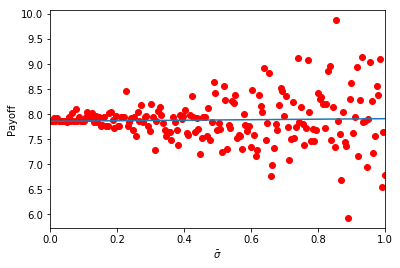

In [84]:
z = np.polyfit(volvol,res, 1)
p = np.poly1d(z)
plt.plot(volvol,res,"ro")
plt.plot(volvol,p(volvol))
plt.xlim(0,1)
plt.xlabel("$\\bar \sigma$")
plt.ylabel("Payoff")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
plt.show()

#  Plotting payoff as a function of \bar \sigma

In [77]:
import numpy as np
import math
import matplotlib.pyplot as plt
from binomial_v5 import jarrow_rudd

k = np.linspace(0.1,100,1000)
res = np.zeros((len(k)))

for x in range(len(k)):
    res[x] = jarrow_rudd(s=100.0, k=100.0, t=1, v=0.25, rf=0.02, cp=1, div=0.02,
                                am=True, n=100,x=1,b=0,volvol=1,kv=k[x],adjust_step=False)["value"]

y=0.000590x+(9.718594)


/Users/markus/anaconda3/envs/Prosjektfinans/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


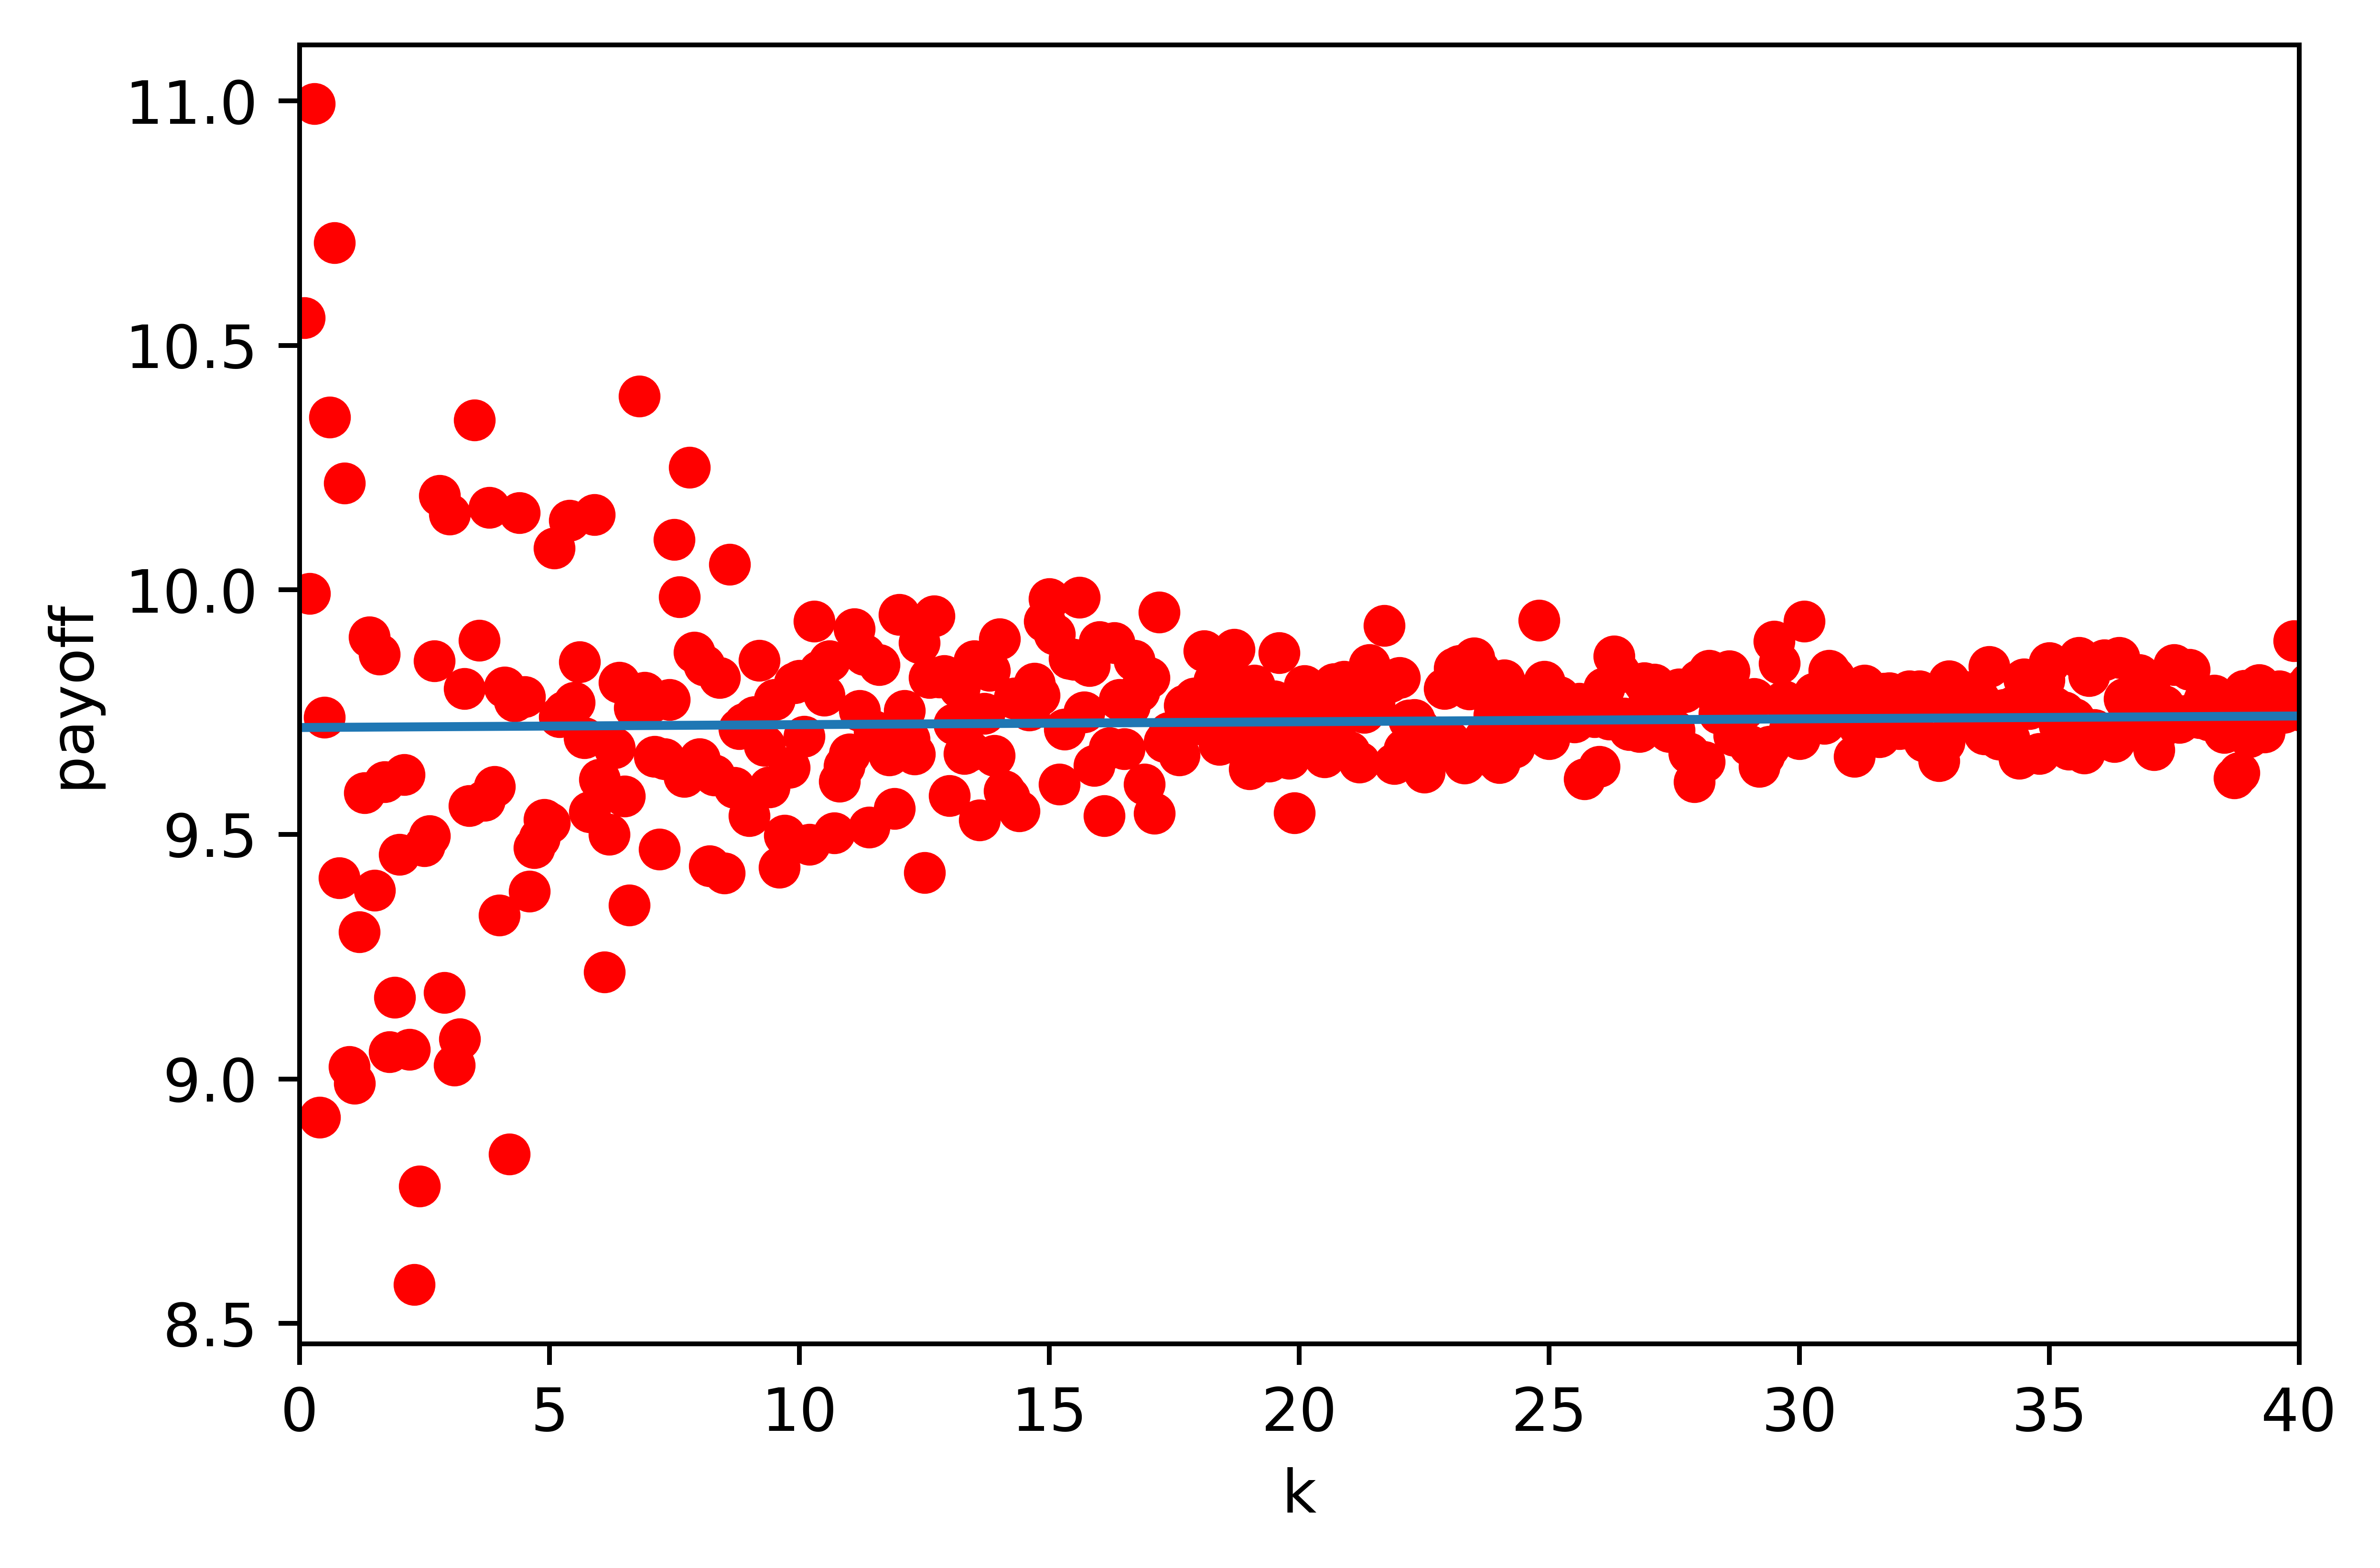

In [79]:
z = np.polyfit(k,res, 1)
p = np.poly1d(z)
f = plt.figure(dpi=900)
f1 = f.add_subplot(1,1,1)
f1.plot(k,res,"ro")
f1.plot(k,p(k))
f1.set_xlim([0,40])
f1.set_xlabel("k")
f1.set_ylabel("Payoff")
print ("y=%.6fx+(%.6f)"%(z[0],z[1]))
f.show()

In [31]:
from testing import gen_hest_vol
n = 100
t = 5
h = t / n
v = 0.25
k = 0.2
volvol= 1.1

vol, h = gen_hest_vol(n, t, v, k, volvol, norm=False, adjust_step=False)
d = np.zeros(len(h))
d[0]= h[0]
for i in range(1,len(d)):
    d[i] = d[i-1] + h[i]


n = 10000
vol2, h2 = gen_hest_vol(n, t, v, k, volvol, norm=False, adjust_step=False)
d2 = np.zeros(len(h2))
d2[0]= h2[0]
for i in range(1,len(d2)):
    d2[i] = d2[i-1] + h2[i]


# code for making plot showing variance problem

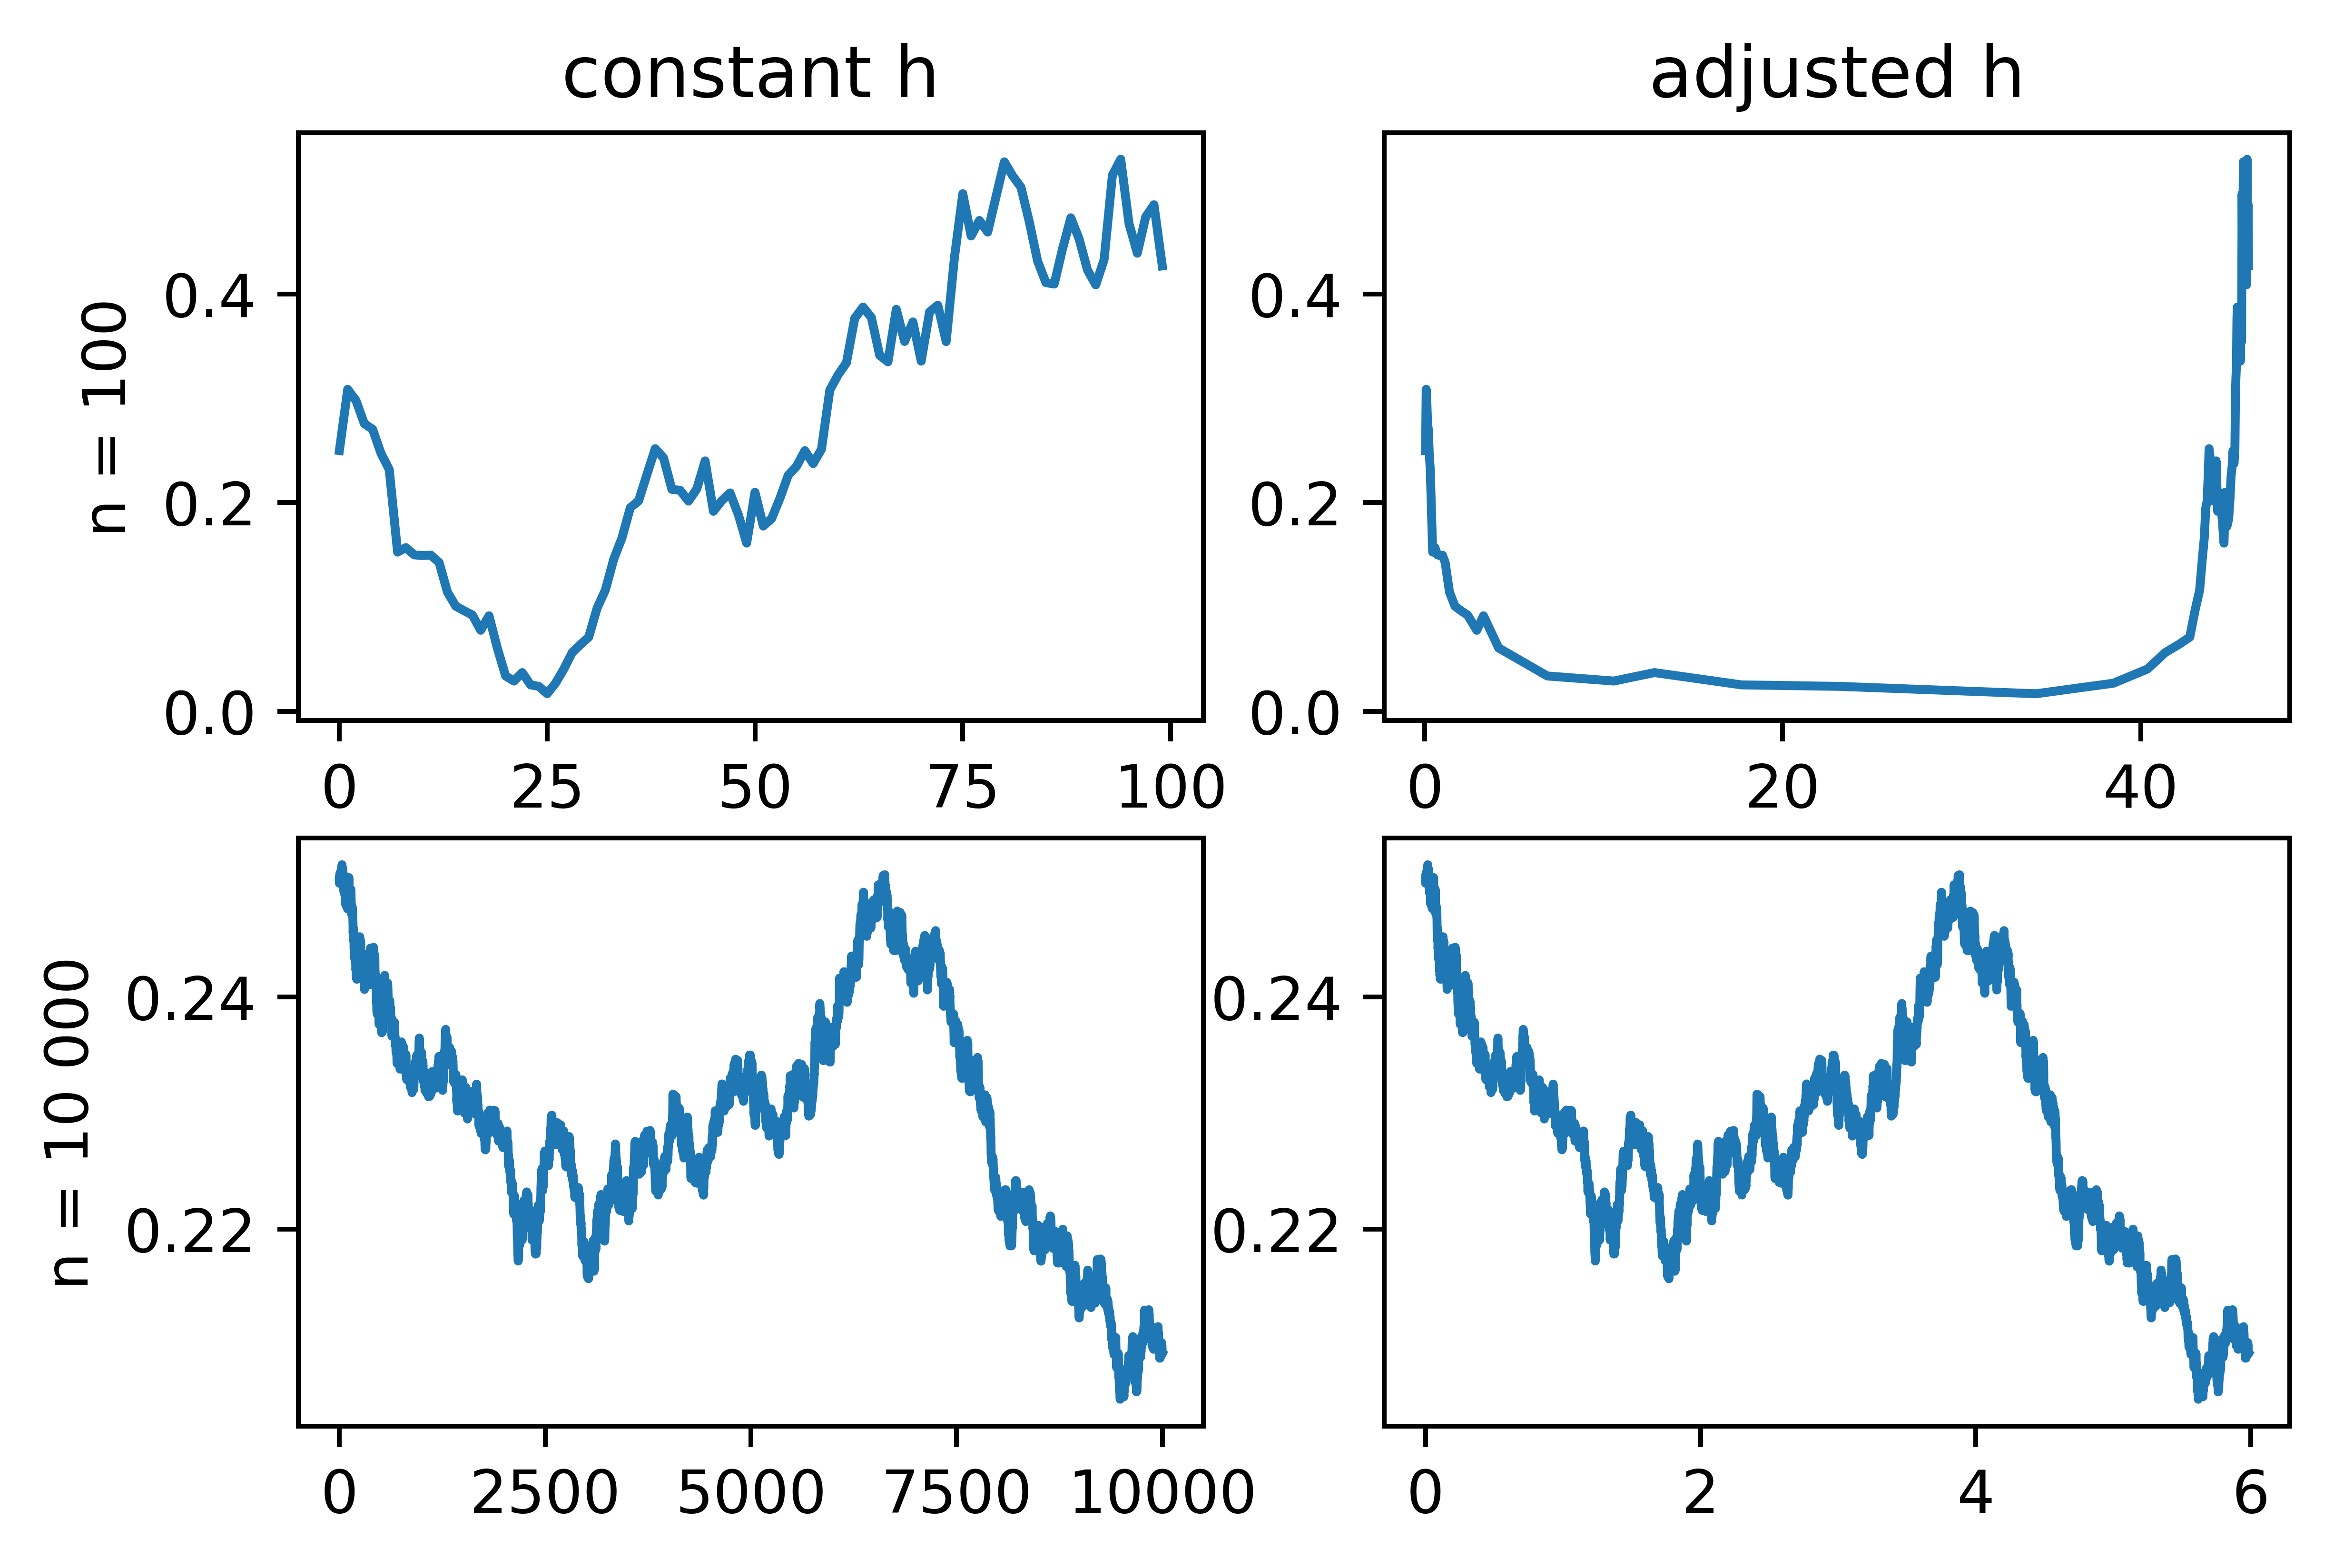

In [44]:
        
fig = plt.figure(dpi=900)
p1 = fig.add_subplot(2,2,1)
p2 = fig.add_subplot(2,2,2)
p3 = fig.add_subplot(2,2,3)
p4 = fig.add_subplot(2,2,4)


p1.plot(vol)
p1.set_title(label="constant h")
p1.set_ylabel(ylabel=" n = 100")
p2.plot(d,vol)
p2.set_title(label="adjusted h")
p3.plot(vol2)
p3.set_ylabel(ylabel=" n = 10 000")
p4.plot(d2,vol2)
plt.show()

0.21397079921984263
0.2114853113535978


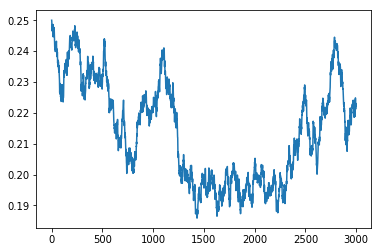

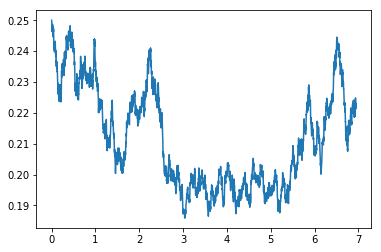

In [114]:
from testing import gen_hest_vol
n = 3000
t = 5
h = t / n
v = 0.25
k = 0.2
volvol= 1.5

vol, h = gen_hest_vol(n, t, v, k, volvol, norm=False, adjust_step=False)

d = np.zeros(len(h))
d[0]= h[0]
for i in range(1,len(d)):
    d[i] = d[i-1] + h[i]
    
print(vol.mean())
print((vol*h).sum()/h.sum())

plt.plot(vol)
plt.show()
plt.plot(d,vol)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (3000,) and (10000,)

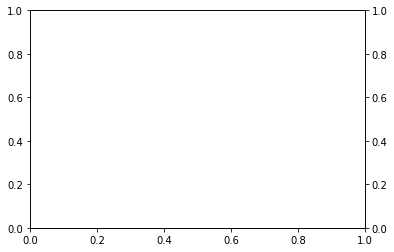

In [119]:
plt.figure(1)
ax = plt.twinx()
plt.plot(d,vol2)
ax.plot(d,vol)